# Un premier exemple
**Marc BUFFAT, dpt mécanique, Université Lyon 1**

In [1]:
%matplotlib inline
from  numpy import *
import matplotlib.pyplot as plt

## Etude d'une pale d'éolienne

L'objectif de l'étude est de modéliser numériquement la déformation d'une pale d'éolienne sous l'effet de la rotation (force centrifuge). Pour cela nous utiliserons une approche mécanique, en construisant un modèle mécanique simplifié que l'on résoudra  ensuite numériquement. Le modèle obtenu est équivalent à celui
obtenu par une approche éléments finis générique, mais la démarche pour l'obtenir est spécifique au cas étudié.

![eolienne](images/eolienne.jpg)

## Démarche

```{admonition} démarche de simulation numérique
:class: encadre

- modèle mathématique (EDP)
- approximation (mécanique) de la solution 
- résolution numérique
- analyse du résultat (erreur)
```


## Modèle mathématique

Le modèle utilisé est un modèle classique d'élasticité linéaire appliqué à une poutre de longueur $R=L$ en traction sous l'effet de la rotation autour d'une de ses extrémités. Dans le repère lié à la pale, le problème est statique et on écrit : 

 - l'équilibre statique d'un élément de poutre de masse $m$ : 
 
$$\Sigma \underbrace{F_t}_\textrm{ forces de traction} + m \underbrace{\Gamma_c}_\textrm{force\ centrifuge} =0 $$

un modèle d'élasticité linéaire donne la force de traction $F_t=ES\frac{\partial u}{\partial r}$

 - d'où l'équation d'équilibre (EDP) avec des conditions aux limites (CL):\
d'encastrement en $r=0$ et de contrainte nulle en $r=R$ 
 
$$
\frac{\partial}{\partial r}\left(ES\frac{\partial u}{\partial r}\right)+\rho S\omega^{2}r = 0
$$
$$\mbox{+C.L. }\,\,\, u(r=0)=0,\,\, ES\frac{\partial u}{\partial r}(r=R)=0$$

## Modèle discret d'une pale

Au lieu de résoudre le problème continu précédent, on discrétise la poutre comme une série de petites poutres élémentaires, que l'on peut assimiler chacune à un système masse ressort, dont les propriétés mécaniques dépendent de la position (la masse et la raideur dépendent de la section).

![modèle pale](images/modeleol.png)



## Modèle discret d'un bout de  poutre en traction

On considère un élément de poutre modélisé par le système masse ressort suivant:

![modèle mécanique](images/ressort4.png)

- poutre = système masse + ressort
- la raideur du ressort $k$ est fonction  du module Young $E$ et de la longueur de l'élément $l$
$$ k=\frac{E\, S}{l}$$
- la masse $m=\rho S l$ est répartie uniformément aux 2 extrémités 1 et 2
  
  
- le bilan des forces appliquées sur les 2 masses comprend :

1. la force de rappel du ressort sur les 2 masses
 
$$k(u_2-u_1),k(u_1-u_2) $$
 
2. la force centrifuge sur les 2 masses 
 
$$ \frac{m}{2} \omega^2 r_1  , \frac{m}{2} \omega^2 r_2$$
    
3. les efforts extérieurs $\vec{F_e}$ exercés par les 2 éléments de poutre voisins : $f^1_1$ et $f^1_2$
  
- L'équation du modèle s'écrit sous forme matricielle pour chaque élément

$$
 \left[\begin{array}{cc}
k & -k\\
-k & k
\end{array}\right]\left[\begin{array}{c}
u_{1}\\
u_{2}
\end{array}\right]=\left[\begin{array}{c}
f^1_{1} + \frac{m}{2} \omega^2 r_1\\
f^1_{2} + \frac{m}{2} \omega^2 r_2
\end{array}\right]
$$
- regroupement (assemblage) des équations éléments par éléments

### cas de 2 éléments 

Dans le cas de 2 éléments de masse et longueur identiques, on a 3 inconnues $u_1,u_2,u_3$

- elts 1

$$
 \left[\begin{array}{cc}
k & -k\\
-k & k
\end{array}\right]\left[\begin{array}{c}
u_{1}\\
u_{2}
\end{array}\right]=\left[\begin{array}{c}
f^1_{1} + \frac{m}{2} \omega^2 r_1\\
f^1_{2} + \frac{m}{2} \omega^2 r_2
\end{array}\right]
$$

- elts 2

$$
 \left[\begin{array}{cc}
k & -k\\
-k & k
\end{array}\right]\left[\begin{array}{c}
u_{2}\\
u_{3}
\end{array}\right]=\left[\begin{array}{c}
f^2_{2} + \frac{m}{2} \omega^2 r_2\\
f^2_{3} + \frac{m}{2} \omega^2 r_3
\end{array}\right]
$$


- combinaison des équations pour éliminer les liaisons $f^1_2 = - f^2_2$
  
$$
 \left[\begin{array}{cc}
k & -k & 0\\
-k & 2k & -k \\
0  & k & -k \\
\end{array}\right]\left[\begin{array}{c}
u_{1}\\
u_{2}\\
u_{3}
\end{array}\right]=\left[\begin{array}{c}
f^1_{1} + \frac{m}{2} \omega^2 r_1\\
m \omega^2 r_2 \\
f^2_{3} + \frac{m}{2} \omega^2 r_3
\end{array}\right]
$$

- imposition des CL pour éliminer les efforts externes

- encastrement en $r=r_1$:\
 l'équation  $ u_1 = 0 $ remplace la 1ere équation

- condition libre : contrainte nulle en $r=r_3$ \
 $f^2_3 = 0$

d'où le système linéaire 3x3 à résoudre

$$
 \left[\begin{array}{cc}
1 & 0 & 0\\
-k & 2k & -k \\
0  & k & -k \\
\end{array}\right]\left[\begin{array}{c}
u_{1}\\
u_{2}\\
u_{3}
\end{array}\right]=\left[\begin{array}{c}
0\\
m \omega^2 r_2 \\
\frac{m}{2} \omega^2 r_3
\end{array}\right]
$$

```{admonition} généralisation avec N éléments
:class: encadre
Par assemblage de N éléments
on obtient un système linéaire de dimension $N+1$, qui est équivalent à un modèle éléments finis!
```


 ### modèle éléments finis discret pour Ne=6 éléments
 Le système linéaire (modèle éléments finis) à résoudre est de la forme suivante:
 
 $$
 \left[\begin{array}{ccccccc}
{1} & 0 & 0 & 0 & 0 & 0 & 0\\
0 & {k}_{1}+{k}_{2} & -{k}_{2} & 0 & 0 & 0 & 0\\
0 & -{k}_{2} & {k}_{2}+{k}_{3} & -{k}_{3} & 0 & 0 & 0\\
0 & 0 & -k_{3} & k_{3}+k_{4} & -k_{4} & 0 & 0\\
0 & 0 & 0 & -k_{4} & k_{4}+k_{5} & -k_{5} & 0\\
0 & 0 & 0 & 0 & -k_{5} & k_{5}+k_{6} & -k_{6}\\
0 & 0 & 0 & 0 & 0 & -k_{6} & {k}_{6}
\end{array}\right]\left[\begin{array}{c}
u_{1}\\
u_{2}\\
u_{3}\\
u_{4}\\
u_{5}\\
u_{6}\\
u_{7}
\end{array}\right]=\omega^{2}\left[\begin{array}{c}
0\\
m_{2}r_{2}\\
m_{3}r_{3}\\
m_{4}r_{4}\\
m_{5}r_{5}\\
m_{6}r_{6}\\
m_{7}r_{7}/2
\end{array}\right]
 $$


## Application
-  choix des paramètres 

 $L=14 m$ , $\omega=60 tr/min$ , $M=800 kg$ , $\rho
 = 8000 kg/m^{3}$
  , $E=200\,10^{9}\, N/m^{2}$
 (acier)

- raideur équivalente globale $K \leftarrow ES/L$, soit par élément $k=K*N_e$
- système linéaire équivalent

$$ \mathcal{A}  U = \mathcal{B} $$

- résolution à l'aide d'algorithme de type élimination de Gauss 
- étude de la précision en fonction du nombre d'éléments $Ne$ : $Ne=5,10,20$
  
on compare avec la solution analytique:

$$ u_{ex} = -\frac{\rho S\omega^2}{E S}(\frac{r^3}{6} - \frac{L^2 r}{2})$$

- analyse: calcul de la contrainte en r=0 

### Algorithme

 - définition des paramètres (variables)
 - calcul matrice $\mathcal{A}$ et $\mathcal{B}$ par assemblage (boucle sur les éléments)
 - résolution du système pour un nombre d'éléments $N$  fixé
 - calcul de la déformée discrète et de la contrainte max
 - analyse de la précision en fonction de N

### Programmation en Python
 - définition des paramètres numériques
 - écriture de fonctions: assemblage, calcul de la solution (traction) en particulier pour l'étude paramétrique

In [2]:
""" modelisation d'une pale d'eolienne par elements finis (M. BUFFAT) """
import numpy as np
import matplotlib.pyplot as plt
# parametres
L=14.        # longueur
M=800.       # masse
rho=8000.    # densite
S=M/(rho*L)  # section equivalente
E=200e+09    # module d'Young
K=E*S/L      # raideur globale de la pale
w=60.        # rotation en tours/minute

In [3]:
def assemblage(Ae,ne):
    """ assemblage de la matrice A sur ne elts """
    A=np.zeros((ne+1,ne+1))
    for l in range(ne):
        A[l:l+2,l:l+2]=A[l:l+2,l:l+2]+Ae;
    # application de la C.L. en 0
    A[0,:]=0; A[:,0]=0; A[0,0]=1;
    return A

def traction(ne,w,L,M,K):
    """ calcul de la déformée en traction d'une pale en rotation w, de longueur L ,
        de masse M et de rigidité K  avec ne elts:
        renvoie le déplacement U à la position R et la tension en r=0.0  
    """
    omega=w*2*np.pi/60. # rotation en rd/s
    l=L/ne           # longueur d'un élément
    m=M/ne           # masse élémentaire
    k=K*ne           # raideur élémentaire d'un elt de pale ES/l
    U=np.zeros((ne+1))    # deformation aux noeuds
    R=l*np.arange(0,ne+1) # position des noeuds
    F=omega**2*R          # force
    Ke=k*np.array([[1,-1],[-1,1]]) # matrice  élémentaire de rigidite
    Me=m/2*np.array([[1,0],[0,1]]) # et de masse
    # calcul des matrices globales par assemblage
    Ka=assemblage(Ke,ne)
    Ma=assemblage(Me,ne)
    # résolution
    B=np.dot(Ma,F); B[0]=0; # calcul du second membre
    U=np.linalg.solve(Ka,B)
    # tension en O
    T0=np.dot(Ke[0,:],U[0:2])
    return U,R,T0

### Calcul de la solution

In [4]:
# etude de la solution en fonction du nbre d'elts
U1,R1,T1=traction(5,w,L,M,K)
U2,R2,T2=traction(10,w,L,M,K)
U3,R3,T3=traction(20,w,L,M,K)
# solution exacte 
omega=w*2*np.pi/60
m = rho*S
Uex = -((m*omega**2)/(E*S))*(R3**3/6. - L**2*R3/2.)
Tex = (m*omega**2)*L**2/2.
# resultats
print("Ne          : {:10d}  {:10d}  {:10d}        exacte".format(5,10,20))
print("Tension  r=0: {:.4f}  {:.4f}  {:.4f}  {:.4f}".format(T1,T2,T3,Tex))
print("Deformee max: {:.10f}  {:.10f}  {:.10f}{:10f}".format(U1[-1],U2[-1],U3[-1],Uex[-1]))

Ne          :          5          10          20        exacte
Tension  r=0: -221079.1386  -221079.1386  -221079.1386  221079.1386
Deformee max: 0.0014732714  0.0014516056  0.0014461892  0.001444


### Tracé et analyse du résultat

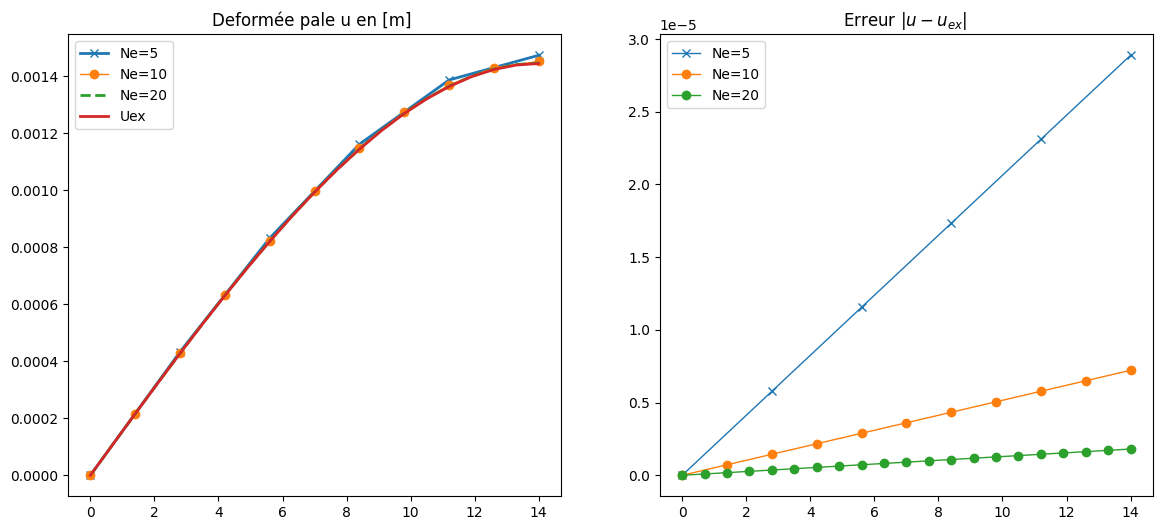

In [6]:
# trace du résultat
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(R1,U1,'-x',lw=2,label="Ne=5")
plt.plot(R2,U2,'-o',lw=1,label="Ne=10")
plt.plot(R3,U3,'--',lw=2,label="Ne=20")
plt.plot(R3,Uex,'-',lw=2,label="Uex")
plt.legend(loc=0)
plt.title("Deformée pale u en [m] ")
plt.subplot(1,2,2)
plt.plot(R1,U1-Uex[::4],'-x',lw=1,label="Ne=5")
plt.plot(R2,U2-Uex[::2],'-o',lw=1,label="Ne=10")
plt.plot(R3,U3-Uex[::],'-o',lw=1,label="Ne=20")
plt.legend(loc=0)
plt.title("Erreur $|u-u_{ex}|$ ")
plt.draw()
plt.show()

## Résumé

```{admonition} démarche appliquée
:class: encadre

1. Écriture du Modèle continu: EDP + CL: $\mathcal{L}u=f$
 
2. Discrétisation du domaine en éléments (approche mécanique)

3. Modélisation (mécanique) par éléments

4. Construction du modèle discret:

  - système linéaire $\mathcal{A}\{u^{h}\}=\mathcal{B}$
  - assemblage de $\mathcal{A}$ et $\mathcal{B}$
  - résolution

5. Analyse du résultat: étude de la précision, calcul de la tension et de la déformée maximale
```